
# __Springboard Data Science Course__

## _Take Home Challenge_

##### _Ben Takacs_
###### Python verysion 3.10.04

---


## __Part 1: Exploratory data analysis__


## __Imports__

In [81]:
import pandas as pd
import numpy as np
import datetime
import json
import os

import matplotlib.pyplot as plt
%matplotlib inline

## __Load Data__

In [82]:
f = open('logins.json') # open file
df = pd.DataFrame(json.load(f)) # load data as dataframe
f.close() # close file
df = df.rename(columns={'login_time':'logins'})
df

,logins
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [83]:
df.logins = pd.to_datetime(df.logins)
df.isnull().sum()

logins    0
dtype: int64

In [84]:
df = df.set_index(df.logins)
df = df.drop(columns='logins')
df['a'] = 1
df

,a
logins,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


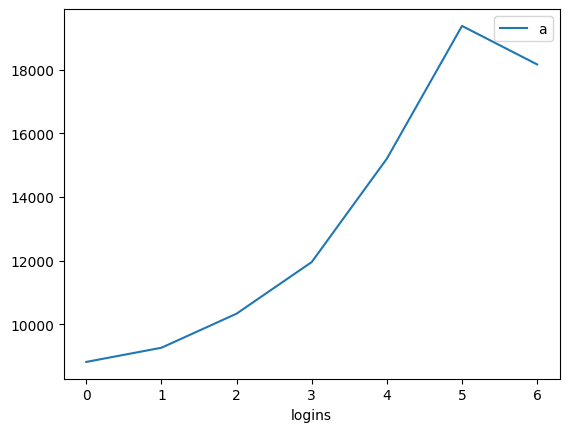

In [85]:
df.groupby(df.index.day_of_week).count().plot(kind="line")
plt.show()

Logins increase throughout week, maxing out on Saturday, but still high Sunday.

<Axes: xlabel='logins'>

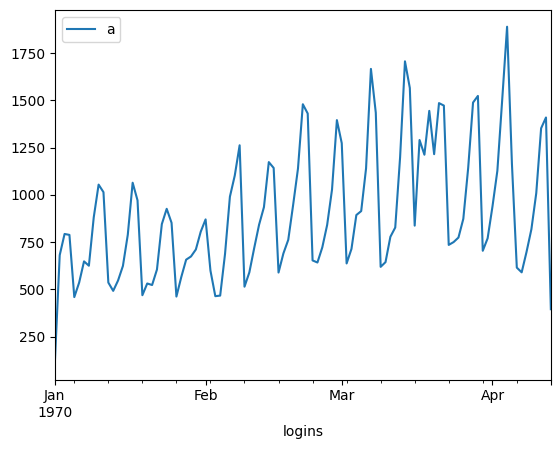

In [86]:
# Aggregate into days
days = df.resample('d').count()
days.plot()

Logins have weekly seasonality, trend is generally increasing

In [87]:
agg = df.resample('15min').count()
agg_sum = agg.groupby(agg.index.time).sum()
agg_mean = agg.groupby(agg.index.time).mean()
agg_sum

,a
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549
...,...
22:45:00,1637
23:00:00,1573
23:15:00,1552
23:30:00,1456


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_55915/1861477019.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time = pd.to_datetime(agg_sum.index.astype(str))


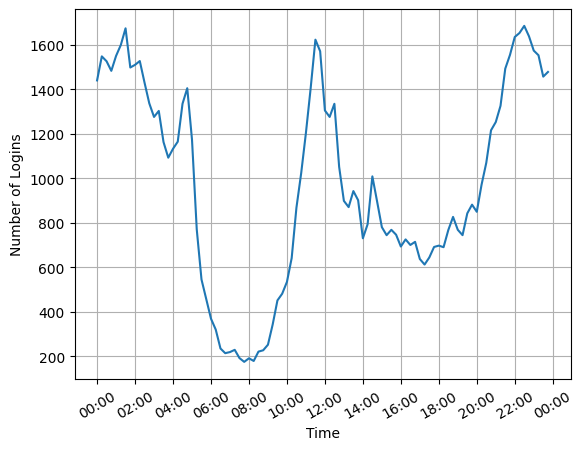

In [88]:
import matplotlib.dates as mdates
time = pd.to_datetime(agg_sum.index.astype(str))

plt.plot()
# group.plot()
plt.plot(time, agg_sum.values)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Every 2 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  # Format as HH:MM
plt.xticks(rotation=30)
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

From here we can see that the majority of logins occur about every 9 hours, starting around 2 AM, then 11 AM, then 10 PM. There is a huge drop of logins between about 5 AM and 11 AM, where it reaches one of three login peaks. Demand is high from midnight to 5 AM, and then again from for an hour from 11 AM to 1 PM, and again from 9 PM to midnight.


In [89]:
login_weekday = pd.DataFrame()

for i, row in agg.iloc[16:,:].iterrows():
    time = i.time()
    if (i.hour == 0) & (i.minute == 0):
        index = i
    login_weekday.loc[index, time] = row['a']

login_weekday.dropna(inplace=True)
login_weekday.head(3)

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
1970-01-02,10.0,18.0,12.0,13.0,9.0,8.0,10.0,6.0,7.0,18.0,...,11.0,14.0,15.0,18.0,21.0,17.0,12.0,12.0,12.0,15.0
1970-01-03,5.0,10.0,7.0,17.0,13.0,13.0,17.0,11.0,22.0,21.0,...,6.0,10.0,12.0,15.0,19.0,17.0,13.0,17.0,12.0,15.0
1970-01-04,11.0,14.0,15.0,12.0,7.0,15.0,29.0,25.0,21.0,32.0,...,4.0,6.0,9.0,4.0,6.0,7.0,2.0,7.0,5.0,6.0


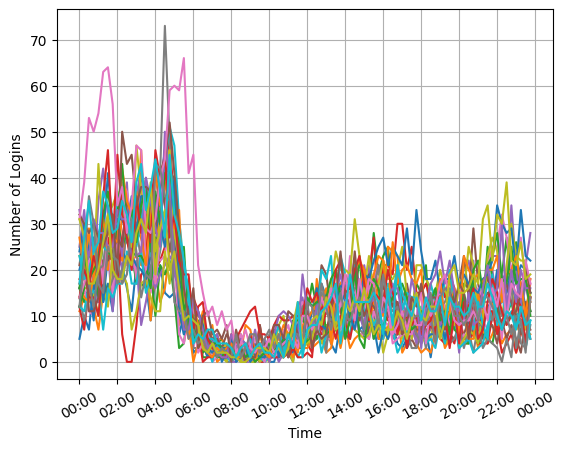

In [90]:
# Plot weekends only
plt.figure()
for i, row in login_weekday.iterrows():
    if i.weekday() in [5, 6]:
        plt.plot(pd.to_datetime(login_weekday.columns.astype('str'), format='%H:%M:%S'), row)

# time = pd.to_datetime(agg_sum.index.astype(str))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Every 2 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  # Format as HH:MM
plt.xticks(rotation=30)
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

We can see that on weekends the login times are mostly after midnight, probably after dinner or a party.

In general, there is a weekday cycle of peaks at noon, lunch, for example, and late evening, most likely dinner or an event. There is a weekend cycle with peaks from 12-1 AM and 4-6 AM, most likely comings and goings from parties or bars.

---

## __Part 2: Experiment and metrics design__


Info given: complementary circadian rythms, Gotham active weekday nights, Metro actie weekday days, both active weekends. Toll bridge between two, drivers tend to be city-exclusive. Propose experiment to encourage drivers to be available in both cities by reimbursing toll costs.

&emsp;


### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key measure of success would be additional profits, making sure of two things:  
1. that the new driver arrangement is more efficient than the previous in that more profit is generated (otherwise why are we doing it)  
1.  that the cost of toll reimbursements is being covered and surpassed (otherwise we're losing money)  


### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success

A practical experiment to compare effectiveness would be as follows. 
#### Implementation
We can implement the experiment by making jobs available to driver partners in either city, such that Metropolis jobs are available to Gotham drivers and vice versa. I believe it's important to conduct this experiment as an option rather than an experiment, because even though it lessens the impact of the choice and may make the experiment harder to quantize, forced business practices like this can easily decrease efficiency and profit, which is the opposite of our goal.  
With drivers being able to pick up jobs in the other city, I believe this will have the greatest impact on night drivers and jobs that take place during the more inactive time in the other city from the driver. This is because during the day, the city most likely has day-to-day operations covered. For example, during the weekday when Metropolis is active and Gotham is more inactive, night drivers in Gotham who may not have a lot of work can pick up extra jobs in active Metropolis, and if there are too many active drivers in Metropolis, some can pick up a job in Gotham, as there would be fewer drivers active. Thus, opening the bridge acts a balancing mechanism, when Metropolis needs more drivers Gotham can supply, and vice versa.  
I think the weekends would be relatively unaffected, due to the similar activity levels, but the balancing mechanism would still be able to come into play.  
#### Verify Significance
Tests to verify the significance of the experiment would be, for example, comparing how many jobs are left unfulfilled before and after the bridge opening, if and how much more money drivers are making on average, taking into account the bridge toll.  
Statistically verifying the significance could involve a t-test to see if the mean profit before bridge opening increases post bridge opening. Another test would be seeing if there's correlation between the driver data pre and post bridge opening: before the bridge opening there should be no correlation, but after the opening there should be at least some correlation.
#### Interpretation
If we see correlation between driver data after bridge opening then we know at least that opening the bridge is having an impact, and do determine whether its a positive or negative impact, we need to investigate what happens to the mean revenue generated by driving partners in each city. Seeing an increase in the mean revenue from each city increase would mean that more money is being generated by drivers due to the bridge opening, and that the experiment is a success. We could also look at data from the toll company, and find out when drivers from either city most often cross the bridge to verify that our assumptions of what will happen are correct (drivers crossing during their inactive times). A caveat would be that drivers from another city picking up jobs would take away money from that city, but these would most often be jobs that otherwise couldn't be fulfilled by native drivers.


## __Part 3: Predictive modeling__


### __Load Data__

In [91]:
f = open('ultimate_data_challenge.json') # open file
df = pd.DataFrame(json.load(f)) # load in dataframe
f.close() # close file

In [92]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [93]:
df = df.convert_dtypes()
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [94]:
df.dtypes

city                      string[python]
trips_in_first_30_days             Int64
signup_date               datetime64[ns]
avg_rating_of_driver             Float64
avg_surge                        Float64
last_trip_date            datetime64[ns]
phone                     string[python]
surge_pct                        Float64
ultimate_black_user              boolean
weekday_pct                      Float64
avg_dist                         Float64
avg_rating_by_driver             Float64
dtype: object

In [95]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

Phone type very difficult to infer with data, but we can use means to fill in avg rating of and by driver.

In [96]:
dfr = df.dropna(subset=['phone'])
dfr

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,<NA>,1.0,2014-01-25,iPhone,0.0,False,0.0,0.0,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [97]:
dfr.avg_rating_of_driver.describe()

count     41578.0
mean     4.601467
std      0.617377
min           1.0
25%           4.3
50%           4.9
75%           5.0
max           5.0
Name: avg_rating_of_driver, dtype: Float64

In [98]:
dfr.avg_rating_by_driver.describe()

count     49406.0
mean     4.777861
std      0.447114
min           1.0
25%           4.7
50%           5.0
75%           5.0
max           5.0
Name: avg_rating_by_driver, dtype: Float64

In [99]:
dfr.avg_rating_of_driver = dfr.avg_rating_of_driver.fillna(
    # (dfr.avg_rating_of_driver.mean()+dfr.avg_rating_of_driver.median())/2
    dfr.avg_rating_of_driver.mean()
)
dfr.avg_rating_by_driver = dfr.avg_rating_by_driver.fillna(
    # (dfr.avg_rating_by_driver.mean()+dfr.avg_rating_by_driver.median())/2
    dfr.avg_rating_by_driver.mean()
)


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_55915/3422560180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.avg_rating_of_driver = dfr.avg_rating_of_driver.fillna(
/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_55915/3422560180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.avg_rating_by_driver = dfr.avg_rating_by_driver.fillna(


Since no current date given, let's assume last trip taken to be current date

In [100]:
today = dfr.last_trip_date.max()
today

Timestamp('2014-07-01 00:00:00')

In [101]:
dfr['is_active'] = dfr.last_trip_date.apply(lambda t: 0 if (today - t).days > 30 else 1)
dfr.head(3)

/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_55915/3086156482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['is_active'] = dfr.last_trip_date.apply(lambda t: 0 if (today - t).days > 30 else 1)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0


Create is_active column, 1 if active, 0 if not.

In [102]:
print(dfr.is_active.value_counts()/len(dfr))

is_active
0    0.623599
1    0.376401
Name: count, dtype: float64


62% of users "inactive", and only 38% active.

### __Modeling__

In [133]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix

In [127]:
# Split x and y
x = dfr.drop(columns=['is_active', 'last_trip_date', 'signup_date']) # take out target variable and datetime data
y = dfr.is_active # target variable

# Split into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, random_state=69, stratify=y)

# Select categorical and numerical columns
cat_feat = x.select_dtypes(include=["string", "category", "boolean"]).columns
num_feat = x.select_dtypes(include=["int64", "float64"]).columns

# check
print(cat_feat)

# Create preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_feat),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feat)
])

# Create classifier object
rf = RandomForestClassifier(random_state=69)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Create param grid
param_grid = {
    "classifier__n_estimators": [100, 200, 500],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__bootstrap": [True, False]
}

# Use random search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, verbose=1, random_state=69)
model = random_search.fit(xtrain, ytrain)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Evaluate on test set
ypred = random_search.best_estimator_.predict(xtest)
ypred_prob = random_search.best_estimator_.predict_proba(xtest)
print("Test Accuracy:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Index(['city', 'phone', 'ultimate_black_user'], dtype='object')
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10, 'classifier__bootstrap': True}
Best CV Accuracy: 0.7836732041161076
Test Accuracy: 0.7805822111120071
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      7733
           1       0.74      0.64      0.69      4668

    accuracy                           0.78     12401
   macro avg       0.77      0.75      0.76     12401
weighted avg       0.78      0.78      0.78     12401



This model has an accuracy of 78%, not bad, and close to CV accuracy score, which is good. We can see there is definitely an imbalance in the classes, possibly leading to lower accuracy. Overall the model is strong, but tends to overpredict "inactive users" based on recall rate.

In [136]:
# Get feature names from pre processor
feat_imp = model.best_estimator_.named_steps['classifier'].feature_importances_

fimpdf = pd.DataFrame({'feature':model.best_estimator_.named_steps['preprocessor'].get_feature_names_out(input_features=xtrain.columns), 'importance':feat_imp}).sort_values(by='importance', ascending=True)

<Figure size 640x480 with 0 Axes>

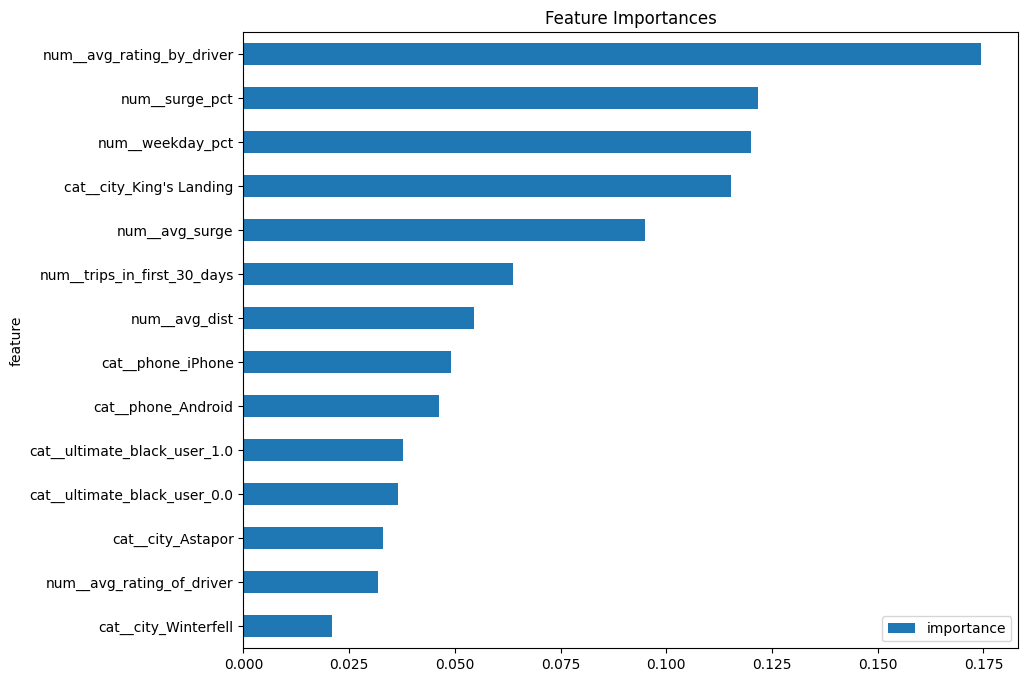

In [137]:
plt.figure()
fimpdf.plot(kind='barh', x='feature', y='importance', title='Feature Importances', figsize=(10, 8))
plt.show()

We see that the average rating by driver is the most important factor, followed by surge %, weekday %, and being in King's Landing.

In [139]:
dfr.groupby('city').is_active.value_counts(normalize=True)

city            is_active
Astapor         0            0.744227
                1            0.255773
King's Landing  1            0.628353
                0            0.371647
Winterfell      0            0.647654
                1            0.352346
Name: proportion, dtype: float64

In [140]:
dfr.groupby('is_active').city.value_counts(normalize=True)

is_active  city          
0          Winterfell        0.484175
           Astapor           0.394886
           King's Landing    0.120939
1          Winterfell        0.436399
           King's Landing    0.338761
           Astapor           0.224841
Name: proportion, dtype: float64

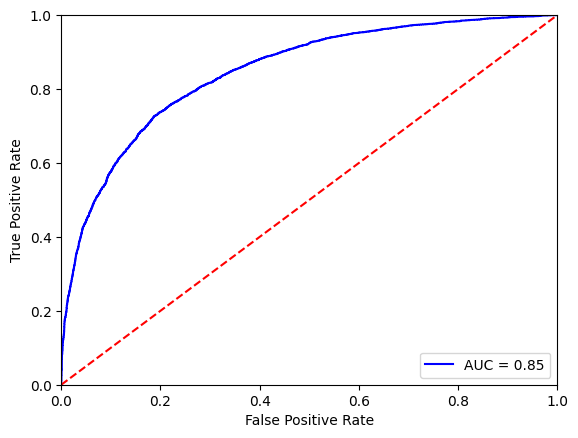

In [130]:
fpr, tpr, threshold = roc_curve(ytest, ypred_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Good ROC curve.

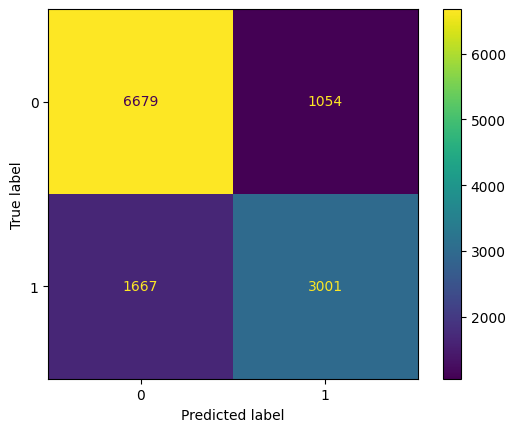

In [135]:
cm = confusion_matrix(ytest, ypred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

We can see reinforcement here that the model is biased toward predicting inactive users.


### __Model Summary__

In this model I used a Random Forest classifier, a train/test 75/25 split, 5-fold CV, and random search hyperparameter optimization. I got a fair accurac y score, 78%, and saw that the model biases towards predicting inactive users. Important features were average rating by driver, surge %, and weekday %. 

Random Forest is a quick and robust model to perform an initial analysis and build a predictive model. Alternatives could be XGBoost or LightGBM, where we can use CV and Bayesian optimization. 

Concerns for the model lie in the unbalanced data set, as we saw earlier only 37% of users are active. I believe the model is valid and will perform well. I was also missing almost 1000 data points on average rating of driver, and while filled with the mean, their true values may have an impact on the model.


### __Recommendations__

I would hesitate to recommend that drivers give riders higher score, as this would bypass whatever true process is underlying this case. However, we can focus on surge and weekday %; reducing surge pricing and adding incentives to use Ultimate on the weekdays could lead to a higher retention rate. I might also recommend increasing marketing in King's Landing. We are of course assuming positive correlation with these features, but in a business-sense it makes sense that weekday users are more likely to be active, as well as surge price takers who likely will use the app whether the prices are high or low, and just want a ride. 